In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np

In [41]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_SPREADS/BASES_DE_DATOS/AL30_COMPLETE_TASAS.csv")

In [42]:
data["spread_comprar_t0_vender_t2"]=data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]
data["spread_vender_t0_comprar_t2"]=data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

In [43]:
time_series = pd.DataFrame(columns=['date','spread'])
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]
threshold_arbitrage=0

for index, row in data_general.iterrows():
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:

        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})], ignore_index=True)

    elif spread_colocar > abs(spread_tomar) and spread_tomar >= 0:
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif  abs(spread_tomar) > spread_colocar and spread_tomar <= 0:  
        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    

In [44]:
time_series = time_series.drop(time_series.iloc[-25:].index)
time_series.drop(columns="date",inplace=True)

window_size = 60
rolling_kurtosis = time_series["spread"].rolling(window_size).kurt()
rolling_skewness = time_series["spread"].rolling(window_size).skew()
rolling_mean = time_series["spread"].rolling(window_size).mean()
rolling_var = time_series["spread"].rolling(window_size).var()

rolling_mean.dropna(inplace=True)
rolling_kurtosis.dropna(inplace=True)
rolling_skewness.dropna(inplace=True)
rolling_var.dropna(inplace=True)

time_series["rolling_kurtosis"]=rolling_kurtosis
time_series["rolling_skewness"]=rolling_skewness
time_series["rolling_mean"]=rolling_mean
time_series["rolling_var"]=rolling_var
time_series["spread_comprart0_vendert2"]=data["spread_comprar_t0_vender_t2"]
time_series["spread_vendert0_comprart2"]=data["spread_vender_t0_comprar_t2"]
time_series.dropna(inplace=True)


In [7]:
time_series

,spread,rolling_kurtosis,rolling_skewness,rolling_mean,rolling_var,spread_comprart0_vendert2,spread_vendert0_comprart2
59,0.226824,1.621185,1.112740,0.226488,0.006918,-0.291939,0.067222
60,0.142845,1.632112,1.147392,0.224462,0.007008,-0.076542,0.057912
61,0.142807,1.656120,1.184466,0.222435,0.007090,-0.076542,0.067278
62,0.142653,1.790660,1.247120,0.219933,0.007108,-0.076538,0.207887
63,0.152039,1.964252,1.317621,0.217588,0.007090,-0.142009,0.048450
...,...,...,...,...,...,...,...
5580,0.313659,27.615523,-4.071666,0.316983,0.002073,-0.010413,0.314638
5581,0.328406,30.403836,-4.436310,0.315836,0.001964,-0.030074,0.314638
5582,0.328406,33.741721,-4.875884,0.314689,0.001853,-0.030074,0.314638
5583,0.318574,34.086423,-4.905711,0.314279,0.001840,-0.015328,0.314638


Mean:  0.20446230667891432
Var:  0.03461672070511768


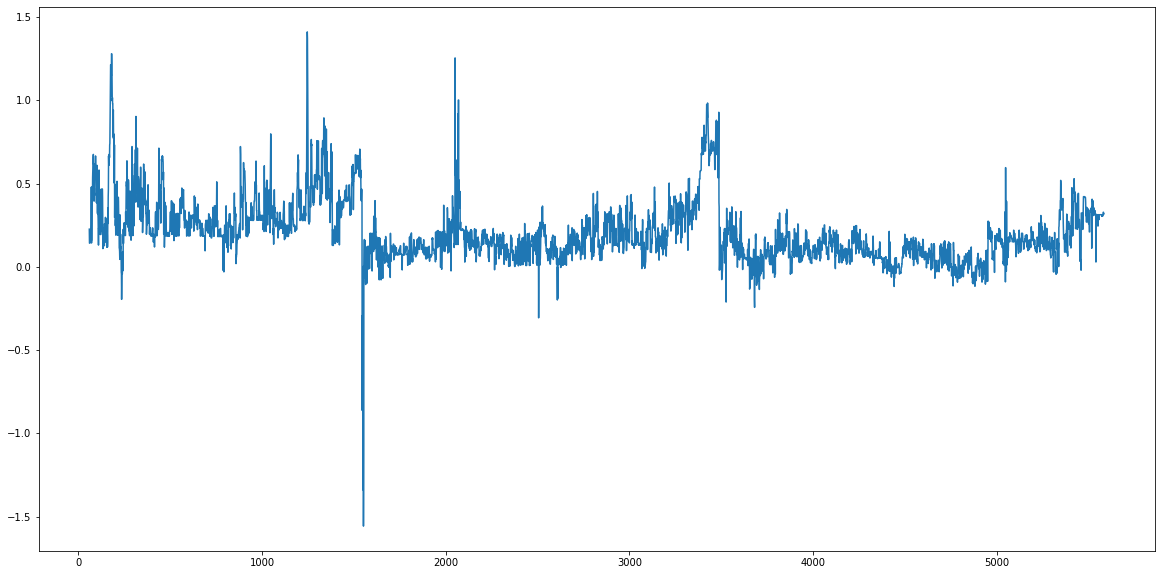

In [8]:
time_series["spread"].plot(figsize=(20,10))
print("Mean: ",np.mean(time_series["spread"]))
print("Var: ",np.var(time_series["spread"]))

Mean:  0.20393467148637537
Var:  0.021172160729377214


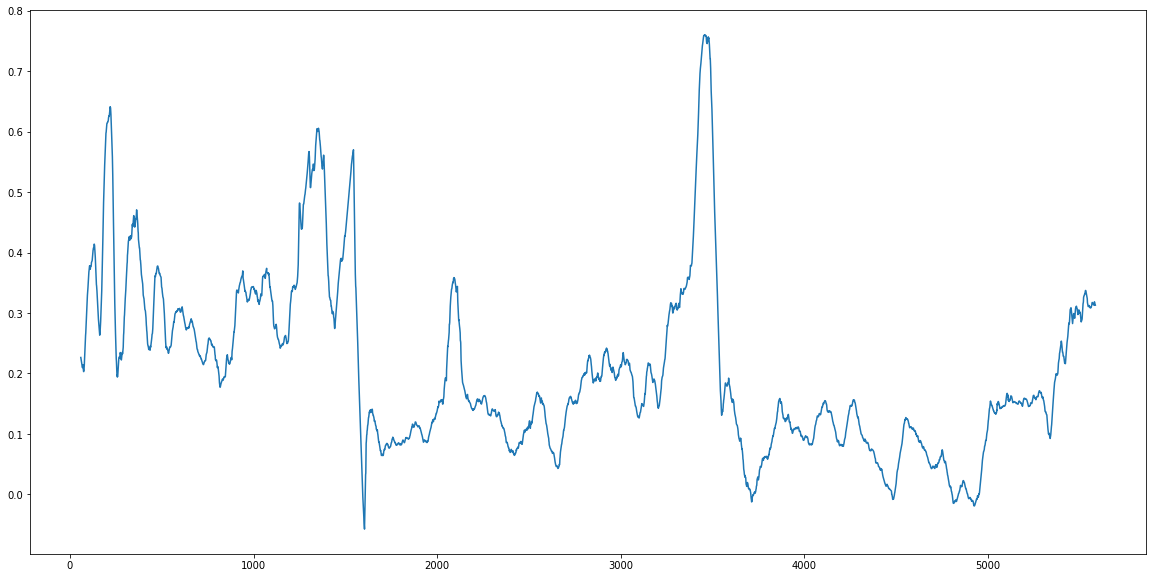

In [9]:
rolling_mean.plot(figsize=(20,10))
print("Mean: ",np.mean(rolling_mean))
print("Var: ",np.var(rolling_mean))

Mean:  0.013637606511467707
Var:  0.0009426742109769675


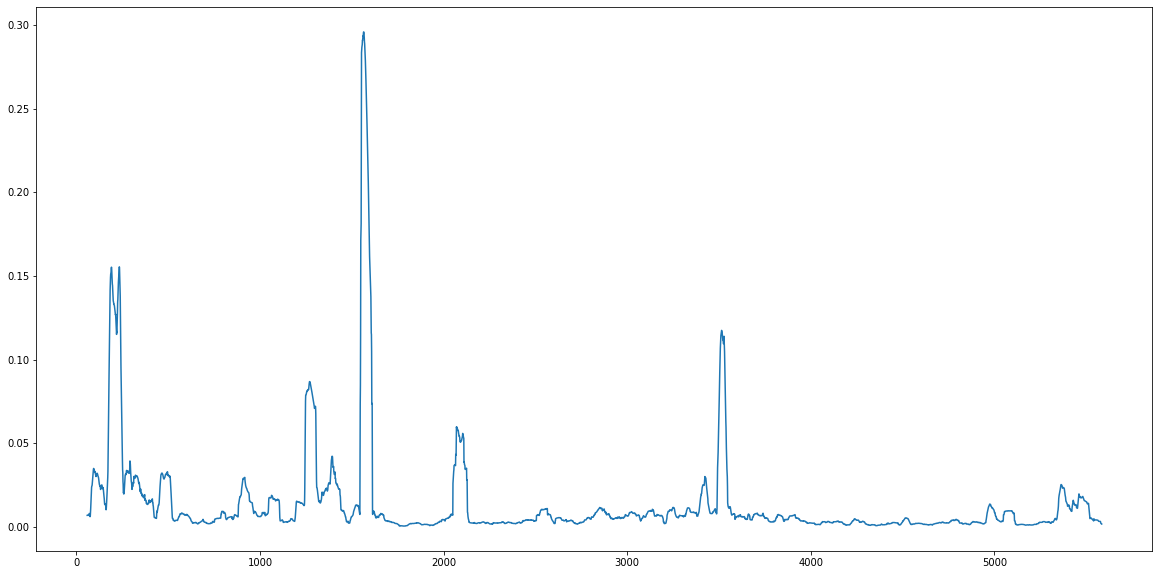

In [10]:
rolling_var.plot(figsize=(20,10))
print("Mean: ",np.mean(rolling_var))
print("Var: ",np.var(rolling_var))

Mean:  0.24562006737982403
Var:  0.798012135188422


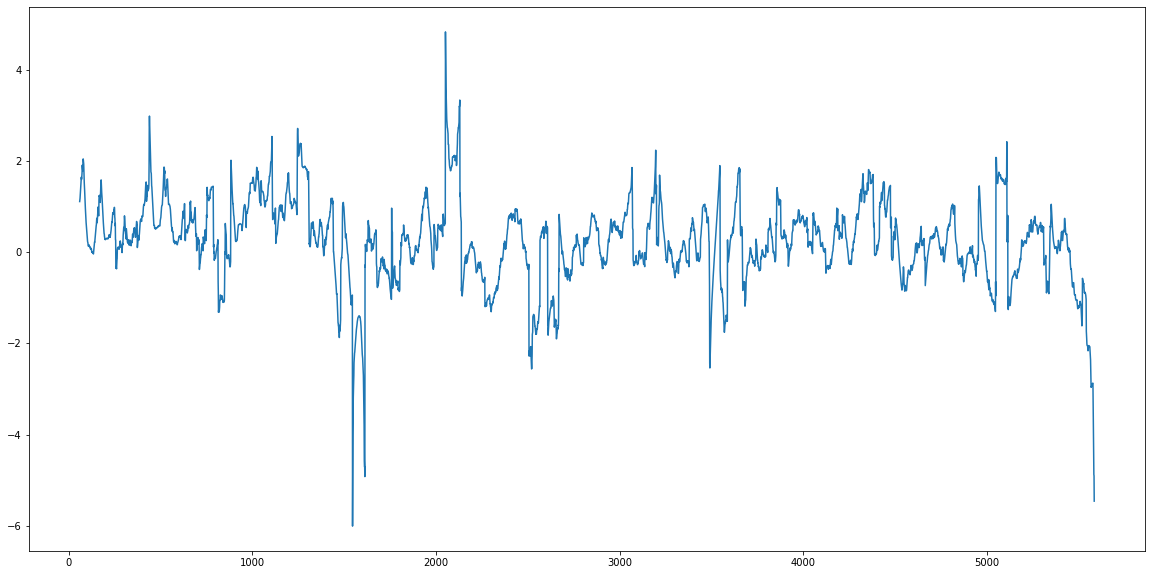

In [11]:
rolling_skewness.plot(figsize=(20,10))
print("Mean: ",np.mean(rolling_skewness))
print("Var: ",np.var(rolling_skewness))

Mean:  0.9243553770198216
Var:  7.600008781166397


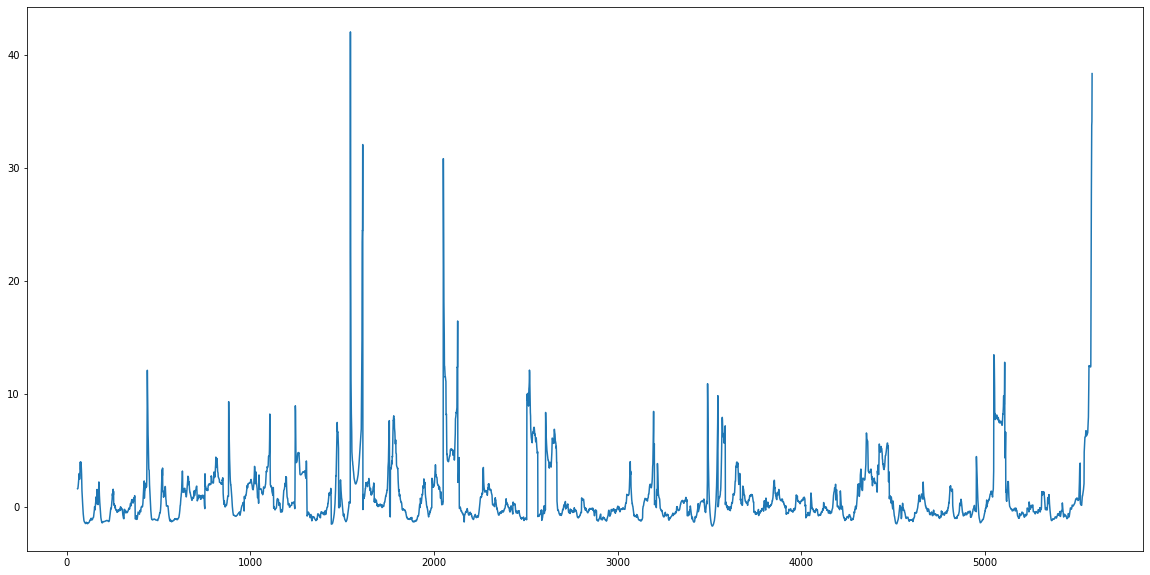

In [12]:
rolling_kurtosis.plot(figsize=(20,10))
print("Mean: ",np.mean(rolling_kurtosis))
print("Var: ",np.var(rolling_kurtosis))

In [13]:
time_series

,spread,rolling_kurtosis,rolling_skewness,rolling_mean,rolling_var,spread_comprart0_vendert2,spread_vendert0_comprart2
59,0.226824,1.621185,1.112740,0.226488,0.006918,-0.291939,0.067222
60,0.142845,1.632112,1.147392,0.224462,0.007008,-0.076542,0.057912
61,0.142807,1.656120,1.184466,0.222435,0.007090,-0.076542,0.067278
62,0.142653,1.790660,1.247120,0.219933,0.007108,-0.076538,0.207887
63,0.152039,1.964252,1.317621,0.217588,0.007090,-0.142009,0.048450
...,...,...,...,...,...,...,...
5580,0.313659,27.615523,-4.071666,0.316983,0.002073,-0.010413,0.314638
5581,0.328406,30.403836,-4.436310,0.315836,0.001964,-0.030074,0.314638
5582,0.328406,33.741721,-4.875884,0.314689,0.001853,-0.030074,0.314638
5583,0.318574,34.086423,-4.905711,0.314279,0.001840,-0.015328,0.314638


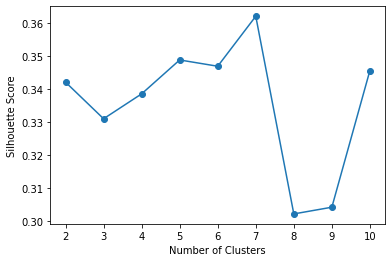

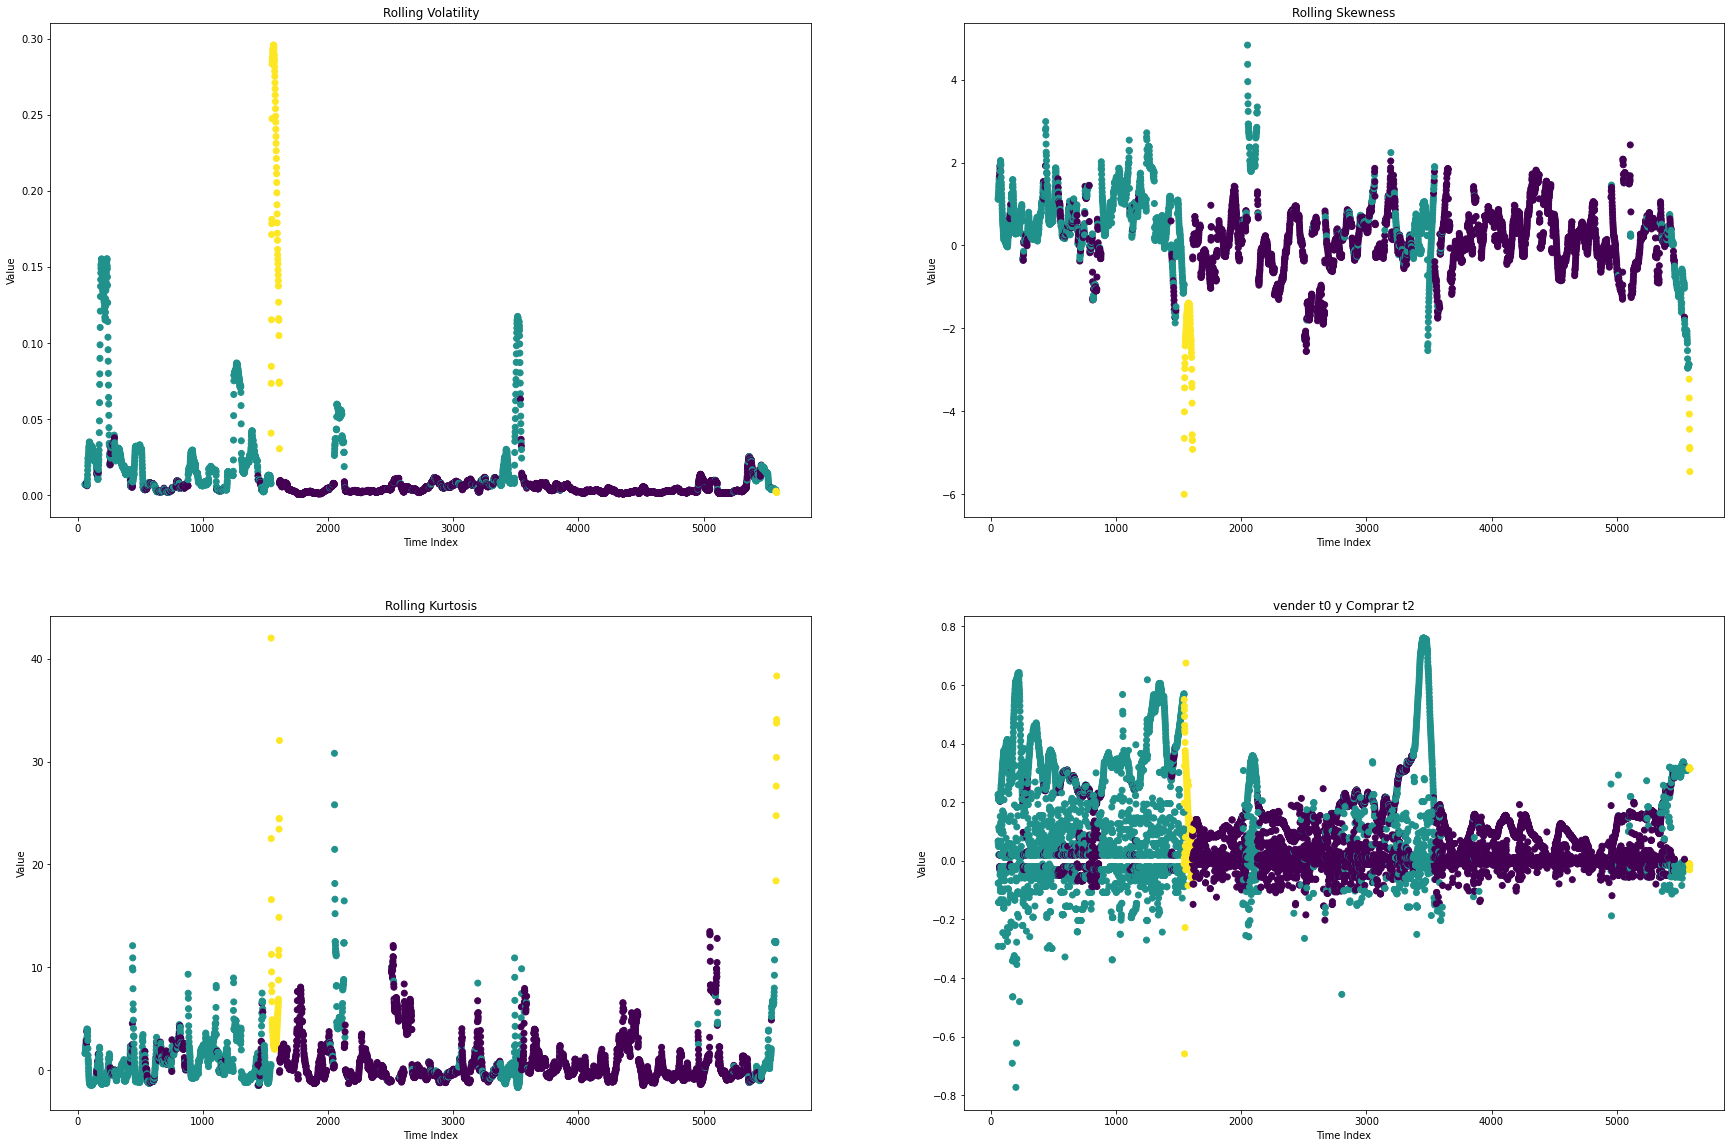

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(time_series[['rolling_var', 'rolling_skewness', 'rolling_kurtosis', 'rolling_mean',"spread_comprart0_vendert2","spread_vendert0_comprart2"]])

# Find the optimal number of clusters using the silhouette score
n_clusters = range(2, 11)
silhouette_scores = []

for n in n_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(scaled_features)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_features, cluster_labels))

# Plot the silhouette scores
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the number of clusters with the highest silhouette score
optimal_clusters = n_clusters[np.argmax(silhouette_scores)]

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3)
time_series['cluster'] = kmeans.fit_predict(scaled_features)



# Plot the clusters
fig, axs = plt.subplots(2, 2, figsize=(30, 20))

axs[0, 0].scatter(time_series.index, time_series['rolling_var'], c=time_series['cluster'], cmap='viridis')
axs[0, 0].set_title('Rolling Volatility')

axs[0, 1].scatter(time_series.index, time_series['rolling_skewness'], c=time_series['cluster'], cmap='viridis')
axs[0, 1].set_title('Rolling Skewness')

axs[1, 0].scatter(time_series.index, time_series['rolling_kurtosis'], c=time_series['cluster'], cmap='viridis')
axs[1, 0].set_title('Rolling Kurtosis')

axs[1, 1].scatter(time_series.index, time_series['rolling_mean'], c=time_series['cluster'], cmap='viridis')
axs[1, 1].set_title('Rolling Variance')

axs[1, 1].scatter(time_series.index, time_series['spread_comprart0_vendert2'], c=time_series['cluster'], cmap='viridis')
axs[1, 1].set_title('Comprar t0 y vender t2')

axs[1, 1].scatter(time_series.index, time_series['spread_vendert0_comprart2'], c=time_series['cluster'], cmap='viridis')
axs[1, 1].set_title('vender t0 y Comprar t2')

for ax in axs.flat:
    ax.set(xlabel='Time Index', ylabel='Value')


# PENDIENTE, CHECAR IFS CON KURTOSIS, VARIANZA, MEDIA Y SKEW

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# IMPORTANCIA DE CARACTERSITICAS

In [16]:
X = time_series[["rolling_kurtosis", "rolling_skewness", "rolling_mean","rolling_var","spread_comprart0_vendert2","spread_vendert0_comprart2"]]
y = time_series["spread"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R2 score: 0.5092453334315974
Mean Squared Error: 0.015328433709064525


In [18]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)


Feature importance (coefficients):
 rolling_kurtosis             0.000812
rolling_skewness             0.023930
rolling_mean                 0.896122
rolling_var                 -0.815245
spread_comprart0_vendert2   -0.348268
spread_vendert0_comprart2    0.082298
dtype: float64


In [19]:
X_with_constant = sm.add_constant(X)
vifs = pd.Series(
    [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])],
    index=X_with_constant.columns,
)
print("Variance Inflation Factors (VIFs):\n", vifs)

Variance Inflation Factors (VIFs):
 const                        3.189646
rolling_kurtosis             1.038597
rolling_skewness             1.073194
rolling_mean                 1.436918
rolling_var                  1.169262
spread_comprart0_vendert2    1.142149
spread_vendert0_comprart2    1.172332
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [20]:
time_series

,spread,rolling_kurtosis,rolling_skewness,rolling_mean,rolling_var,spread_comprart0_vendert2,spread_vendert0_comprart2,cluster
59,0.226824,1.621185,1.112740,0.226488,0.006918,-0.291939,0.067222,1
60,0.142845,1.632112,1.147392,0.224462,0.007008,-0.076542,0.057912,1
61,0.142807,1.656120,1.184466,0.222435,0.007090,-0.076542,0.067278,1
62,0.142653,1.790660,1.247120,0.219933,0.007108,-0.076538,0.207887,1
63,0.152039,1.964252,1.317621,0.217588,0.007090,-0.142009,0.048450,1
...,...,...,...,...,...,...,...,...
5580,0.313659,27.615523,-4.071666,0.316983,0.002073,-0.010413,0.314638,2
5581,0.328406,30.403836,-4.436310,0.315836,0.001964,-0.030074,0.314638,2
5582,0.328406,33.741721,-4.875884,0.314689,0.001853,-0.030074,0.314638,2
5583,0.318574,34.086423,-4.905711,0.314279,0.001840,-0.015328,0.314638,2


In [21]:
mean=time_series["rolling_mean"].mean()
var_mean=time_series["rolling_var"].mean()
kurtosis_mean=time_series["rolling_kurtosis"].mean()
skew_mean=time_series["rolling_skewness"].mean()

# PRIMERA COMPARACION

In [22]:
time_series_filtered = time_series[(time_series["rolling_mean"] > mean) & (time_series["rolling_var"] > var_mean)]
#filtered_normal_ts = filtered_df["normal_ts"]

In [23]:
time_series["spread"].mean()

0.20446230667891432

In [24]:
time_series_filtered["spread"].mean()

0.36280870372116303

# SEGUNDA COMPARACION

In [25]:
time_series_filtered_2 = time_series[(time_series["rolling_mean"] > mean) & (time_series["rolling_var"] > var_mean)& (time_series["rolling_kurtosis"] > kurtosis_mean)]

In [26]:
time_series["spread"].mean()

0.20446230667891432

In [27]:
time_series_filtered_2["spread"].mean()

0.33928341882122826

# TERCERCA COMPARACION

In [28]:
time_series_filtered_3 = time_series[(time_series["rolling_mean"] > mean) & (time_series["rolling_var"] > var_mean) & (time_series["rolling_kurtosis"] > kurtosis_mean)& (time_series["rolling_skewness"] > skew_mean)]

In [29]:
time_series["spread"].mean()

0.20446230667891432

In [30]:
time_series_filtered_3["spread"].mean()

0.40819589371072473

# IMPORTANCIA DE SPREADS

In [31]:
mean_T0_T2=time_series["spread_comprart0_vendert2"].mean()
mean_T2_T0=time_series["spread_vendert0_comprart2"].mean()

In [32]:
time_series_filtered_4 = time_series[(time_series["spread_comprart0_vendert2"] > mean_T0_T2) & (time_series["spread_vendert0_comprart2"] > mean_T2_T0)]

In [33]:
print(time_series["spread"].mean())
print(time_series_filtered_4["spread"].mean())

0.20446230667891432
0.2662942652526514


In [34]:
time_series_filtered_5 = time_series[(time_series["spread_comprart0_vendert2"] < mean_T0_T2) & (time_series["spread_vendert0_comprart2"] < mean_T2_T0)]

In [35]:
print(time_series["spread"].mean())
print(time_series_filtered_5["spread"].mean())

0.20446230667891432
0.2830156056091328


In [36]:
time_series_filtered_6 = time_series[(time_series["spread_comprart0_vendert2"] > mean_T0_T2) & (time_series["spread_vendert0_comprart2"] < mean_T2_T0)]

In [37]:
print(time_series["spread"].mean())
print(time_series_filtered_6["spread"].mean())

0.20446230667891432
0.1411545631817279


In [38]:
time_series_filtered_7 = time_series[(time_series["spread_comprart0_vendert2"] < mean_T0_T2) & (time_series["spread_vendert0_comprart2"] > mean_T2_T0)]

In [39]:
print(time_series["spread"].mean())
print(time_series_filtered_7["spread"].mean())

0.20446230667891432
0.3087801917940632


# ENTROPIA

La entropía es una medida de la incertidumbre o desorden en un sistema. En términos más simples, la entropía mide cuánta información se necesita para describir o predecir el estado de un sistema.
Un rango de entropía de 1.2 a 2.4 indica una variabilidad significativa en la cantidad de información necesaria para describir o predecir el estado del sistema.

En general, una entropía más baja indica que el sistema es más predecible y ordenado, mientras que una entropía más alta indica que el sistema es más impredecible y desordenado. En este caso, la variación en la entropía indica que el sistema puede estar experimentando cambios en su grado de orden y predecibilidad.



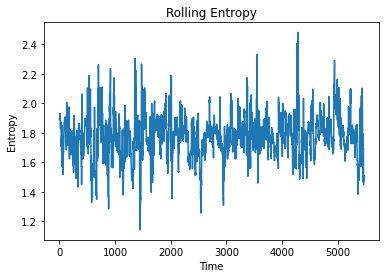

In [46]:
import numpy as np
from scipy.stats import entropy

def rolling_entropy(time_series, window_size):
    n_windows = len(time_series) - window_size + 1
    rolling_entropy = np.zeros(n_windows)
    for i in range(n_windows):
        window = time_series[i:i+window_size]
        rolling_entropy[i] = entropy(np.histogram(window, bins='auto')[0])

    return rolling_entropy

import pandas as pd
import matplotlib.pyplot as plt

# Load time series data
data = time_series["spread"]

rolling_window=60
rolling_ent = rolling_entropy(time_series["spread"].values, window_size=rolling_window)

# Plot the rolling entropy
plt.plot(rolling_ent)
plt.title('Rolling Entropy')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.show()

# HURST EXPONENT

El exponente de Hurst es una medida de la persistencia o memoria a largo plazo de un proceso estocástico.

En términos simples, el exponente de Hurst describe si un proceso tiende a persistir en su comportamiento pasado o si tiende a ser más aleatorio en el futuro. Si el exponente de Hurst es menor que 0.5, el proceso tiene una memoria corta y tiende a ser más aleatorio en el futuro. Si el exponente de Hurst es mayor que 0.5, el proceso tiene una memoria larga y tiende a persistir en su comportamiento pasado.

El exponente de Hurst se utiliza comúnmente en la modelización y el análisis de series temporales, especialmente en áreas como la climatología, la hidrología, las finanzas y la ingeniería. 

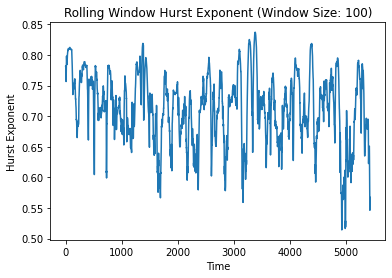

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hurst_rescaled_range(data):
    n = len(data)
    mean_data = np.mean(data)
    deviations = data - mean_data
    cumulative_dev = np.cumsum(deviations)
    min_cumulative_dev, max_cumulative_dev = np.min(cumulative_dev), np.max(cumulative_dev)
    R = max_cumulative_dev - min_cumulative_dev
    S = np.std(data)
    return np.log(R / S) / np.log(n)

def rolling_hurst_exp(data, window):
    hurst_exp = np.zeros(len(data))

    for i in range(window, len(data)):
        window_data = data[i - window : i]

        try:
            H = hurst_rescaled_range(window_data)
            hurst_exp[i] = H
        except FloatingPointError:
            hurst_exp[i] = 0.5  # Default value for cases where the computation fails

    return hurst_exp

# Generate synthetic data for demonstration
# Replace this line with your actual data
data = time_series["spread"]

# Calculate the rolling window Hurst exponent
window_size = 100
hurst_exp = rolling_hurst_exp(data, window_size)

# Display the rolling Hurst exponent as a time series
plt.plot(hurst_exp[window_size:])
plt.xlabel('Time')
plt.ylabel('Hurst Exponent')
plt.title(f'Rolling Window Hurst Exponent (Window Size: {window_size})')
plt.show()

# LYAPUNOV

El exponente de Lyapunov es una medida cuantitativa utilizada en teoría del caos para describir la sensibilidad del comportamiento de un sistema dinámico no lineal a las condiciones iniciales. Es una medida que describe cómo dos trayectorias cercanas en el espacio de fases del sistema se separan a lo largo del tiempo.

Un exponente de Lyapunov positivo indica que el sistema es caótico y altamente sensible a las condiciones iniciales. Un exponente de Lyapunov negativo indica que el sistema es estable y tiende a converger a un estado estacionario.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds

# Define the rolling window Lyapunov Exponent calculation function
def rolling_lyapunov_exponent(ts, window_size, emb_dim=2, lag=None):
    lyapunov_exponents = []
    
    for i in range(len(ts) - window_size):
        window_ts = ts[i:i + window_size]
        le = nolds.lyap_r(window_ts, emb_dim, lag=lag, min_tsep=None, tau=1, min_neighbors=20, trajectory_len=20, fit='RANSAC', debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)
        lyapunov_exponents.append(le)
    
    return lyapunov_exponents

time_series_1 = time_series["spread"]

# Apply the rolling window Lyapunov Exponent calculation to your time series data
window_size = 60
lyapunov_exponents = rolling_lyapunov_exponent(time_series_1, window_size)

# Plot the rolling window Lyapunov Exponent
plt.plot(lyapunov_exponents)
plt.xlabel("Time")
plt.ylabel("Lyapunov Exponent")
plt.title("Rolling Window Lyapunov Exponent")
plt.show()



/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/s

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/a

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefi

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/s

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar

/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 15
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/opt/anaconda3/lib/python3.8/site-packages/nolds/measures.py:268: RuntimeWarning: autocorrelation declined too slowly to find suitable lag, setting lag to 1
  warnings.warn(msg.format(lag), RuntimeWar